In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

from warnings import filterwarnings
filterwarnings('ignore')



import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import model_selection
from sklearn.neighbors import LocalOutlierFactor, KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, StandardScaler
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hitters/hitters.csv


# Index <br>

 1) [Verinin Yüklenmesi ve Veriye Ön Bakış](#1) <br>
 2) [Değişkenler Arasındaki İlişki](#2) <br>
 3) [Boş Değerlerin Bulunması ve Doldurulması, Aykırı Değerlerin Baskılanması](#3) <br>
 4) [Analiz](#4) <br>
 &emsp; A) [Doğrusal Modeller](#4.0)<br>
 &emsp; 4.1) [Basit Doğrusal Regresyon Modeli](#4.1) <br>
 &emsp; 4.2) [Çoklu Doğrıusal Regresyon Modeli](#4.2) <br>
 &emsp; 4.3) [PCR Modeli](#4.3) <br>
 &emsp; 4.4) [PLS Modeli](#4.4) <br>
 &emsp; 4.5) [Ridge Regresyon Modeli](#4.5) <br>
 &emsp; 4.6) [Lasso Modeli](#4.6) <br>
 &emsp; 4.7) [ElasticNet Modeli](#4.7) <br><br>
 &emsp; B)   [Doğrusal Olmayan Modeller](#5.0)<br>
 &emsp; 5.1) [KNN Modeli](#5.1)<br>
 &emsp; 5.2) [SVR (Destek Vektör Regresyonu) Modeli](#5.2)<br>
 &emsp; 5.3) [Doğrusal Olmayan SVR Modeli](#5.3)<br> 
 &emsp; 5.4) [Çok Katmanlı Algılayıcı Modeli](#5.4)<br> 
 &emsp; 5.5) [CART Modeli](#5.5)<br>
 &emsp; 5.6) [Bagged Trees Regresyon Modeli](#5.6)<br>
 &emsp; 5.7) [Random Forests Modeli](#5.7)<br>
 &emsp; 5.8) [Gradient Boosting Machines Modeli](#5.8)<br>
 &emsp; 5.9) [XGBoost Modeli](#5.9)<br>
 &emsp; 5.10) [Light GBM Modeli](#5.10)<br>
 &emsp; 5.11) [CatBoost Modeli](#5.11)<br> 

<a id='1'></a>
## 1. Verinin Yüklenmesi

In [2]:
maindata = pd.read_csv("../input/hitters/hitters.csv")
maindatac = maindata.copy()

## Veriye Ön Bakış

In [3]:
maindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [4]:
maindata.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


<a id ='2'></a>
## 2. Değişkenler Arasındaki İlişki

In [5]:
maindata.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,380.928571,153.404981,16.0,255.25,379.5,512.00,687.0
Hits,322.0,101.024845,46.454741,1.0,64.00,96.0,137.00,238.0
HmRun,322.0,10.770186,8.709037,0.0,4.00,8.0,16.00,40.0
Runs,322.0,50.909938,26.024095,0.0,30.25,48.0,69.00,130.0
RBI,322.0,48.027950,26.166895,0.0,28.00,44.0,64.75,121.0
Walks,322.0,38.742236,21.639327,0.0,22.00,35.0,53.00,105.0
Years,322.0,7.444099,4.926087,1.0,4.00,6.0,11.00,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,816.75,1928.0,3924.25,14053.0
CHits,322.0,717.571429,654.472627,4.0,209.00,508.0,1059.25,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,14.00,37.5,90.00,548.0


In [6]:
maindata.corr()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.000000,0.967939,0.592198,0.913060,0.820539,0.669845,0.047372,0.235526,0.252717,0.236659,0.266534,0.244053,0.166123,0.317550,0.353824,0.352117,0.394771
Hits,0.967939,1.000000,0.562158,0.922187,0.811073,0.641211,0.044767,0.227565,0.255815,0.202712,0.261787,0.232005,0.151818,0.310673,0.320455,0.310038,0.438675
HmRun,0.592198,0.562158,1.000000,0.650988,0.855122,0.481014,0.116318,0.221882,0.220627,0.493227,0.262361,0.351979,0.233154,0.282923,-0.106329,0.039318,0.343028
Runs,0.913060,0.922187,0.650988,1.000000,0.798206,0.732213,0.004541,0.186497,0.204830,0.227913,0.250556,0.205976,0.182168,0.279347,0.220567,0.240475,0.419859
RBI,0.820539,0.811073,0.855122,0.798206,1.000000,0.615997,0.146168,0.294688,0.308201,0.441771,0.323285,0.393184,0.250914,0.343186,0.106591,0.193370,0.449457
Walks,0.669845,0.641211,0.481014,0.732213,0.615997,1.000000,0.136475,0.277175,0.280671,0.332473,0.338478,0.308631,0.424507,0.299515,0.149656,0.129382,0.443867
Years,0.047372,0.044767,0.116318,0.004541,0.146168,0.136475,1.000000,0.920289,0.903631,0.726872,0.882877,0.868812,0.838533,-0.004684,-0.080638,-0.162140,0.400657
CAtBat,0.235526,0.227565,0.221882,0.186497,0.294688,0.277175,0.920289,1.000000,0.995063,0.798836,0.983345,0.949219,0.906501,0.062283,0.002038,-0.066922,0.526135
CHits,0.252717,0.255815,0.220627,0.204830,0.308201,0.280671,0.903631,0.995063,1.000000,0.783306,0.984609,0.945141,0.890954,0.076547,-0.002523,-0.062756,0.548910
CHmRun,0.236659,0.202712,0.493227,0.227913,0.441771,0.332473,0.726872,0.798836,0.783306,1.000000,0.820243,0.929484,0.799983,0.112724,-0.158511,-0.138115,0.524931


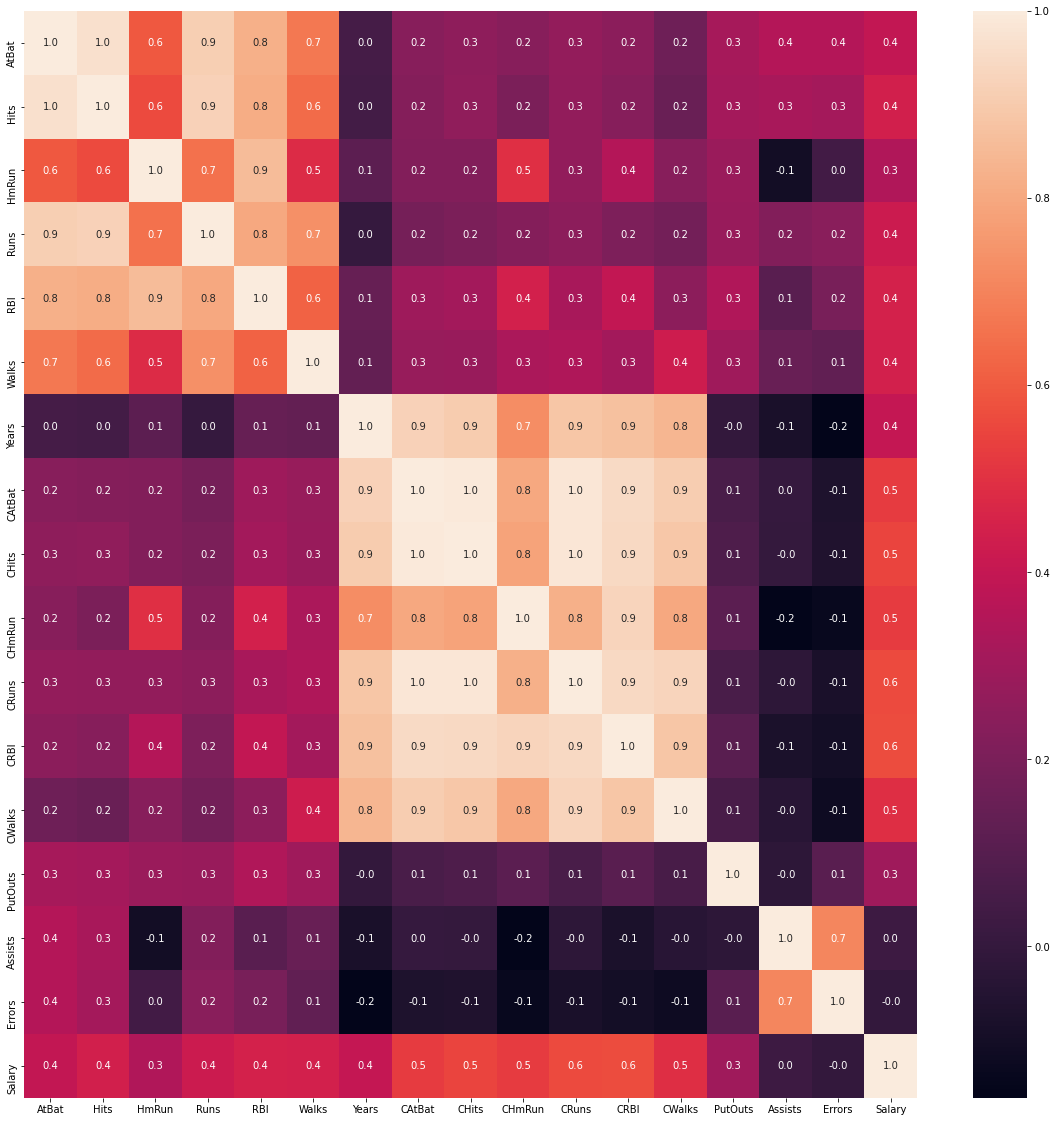

In [7]:
plt.subplots(figsize = (20,20))
sns.heatmap(maindata.corr(), annot = True,  fmt = ".1f");

#### > **YORUM:**  *Data seti içerisindeki verilerin birbirleriyle olan ilişkilerine baktığımızda "Hits","Runs","Walks","RBI" gibi değerlerle "CHits","CHmRun","Cruns","CRBI","CWalks" gibi değerlerin kendi aralarındaki kolerasyonun yüksek olduğunu görüyoruz.*

<a id='3'></a>
## 3.Boş Değerlerin Bulunması ve Doldurulması

In [8]:
maindata.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [9]:
maindata.groupby("League")["Salary"].mean()

League
A    541.999547
N    529.117500
Name: Salary, dtype: float64

In [10]:
maindatac["Salary"].fillna(maindatac.groupby("League")["Salary"].transform("mean"), inplace = True)

In [11]:
maindatac.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

#### > **YORUM:**  *"Salary" değişkeninde yer alan 59 boş değeri, "Salary" değişkeninin "League" değişkenine göre gruplayıp ortalamasını alarak doldurduk.*

## Aykırı Değerlerin Baskılanması

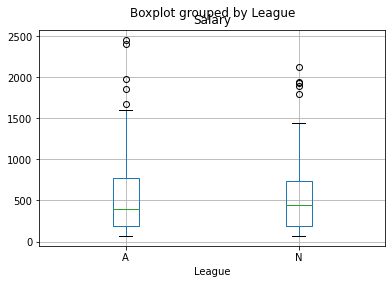

In [12]:
maindata.boxplot(column="Salary", by="League");

In [13]:
outlier = maindatac["Salary"]

Q1 = outlier.quantile(0.25)
Q3 = outlier.quantile(0.75)
IQR = Q3 - Q1

<AxesSubplot:xlabel='Salary'>

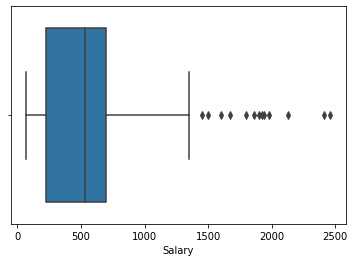

In [14]:
sns.boxplot(x = outlier)

In [15]:
low_limit = Q1 - 1.5*IQR
high_limit = Q3 + 1.5*IQR

In [16]:
(outlier < low_limit) | (outlier > high_limit)

0      False
1      False
2      False
3      False
4      False
       ...  
317    False
318    False
319    False
320    False
321    False
Name: Salary, Length: 322, dtype: bool

In [17]:
outlier_tf = (outlier < low_limit) | (outlier > high_limit)
outlier_tf

0      False
1      False
2      False
3      False
4      False
       ...  
317    False
318    False
319    False
320    False
321    False
Name: Salary, Length: 322, dtype: bool

In [18]:
outlier[outlier_tf] = high_limit
outlier[outlier_tf]  

82     1410.625
84     1410.625
96     1410.625
100    1410.625
110    1410.625
112    1410.625
163    1410.625
179    1410.625
217    1410.625
229    1410.625
248    1410.625
278    1410.625
313    1410.625
Name: Salary, dtype: float64

<AxesSubplot:xlabel='Salary'>

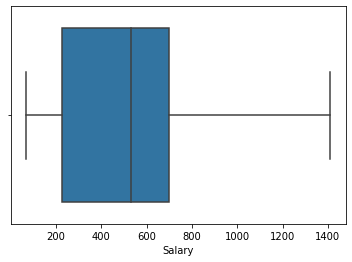

In [19]:
sns.boxplot(x = outlier)

#### > **YORUM:**  *Aykırı değerleri bulduk ve baskılama yöntemi uygulayarak bunları alt limite veyahut üst limite eşitledik*

<a id='4'></a>
## 4. Analiz

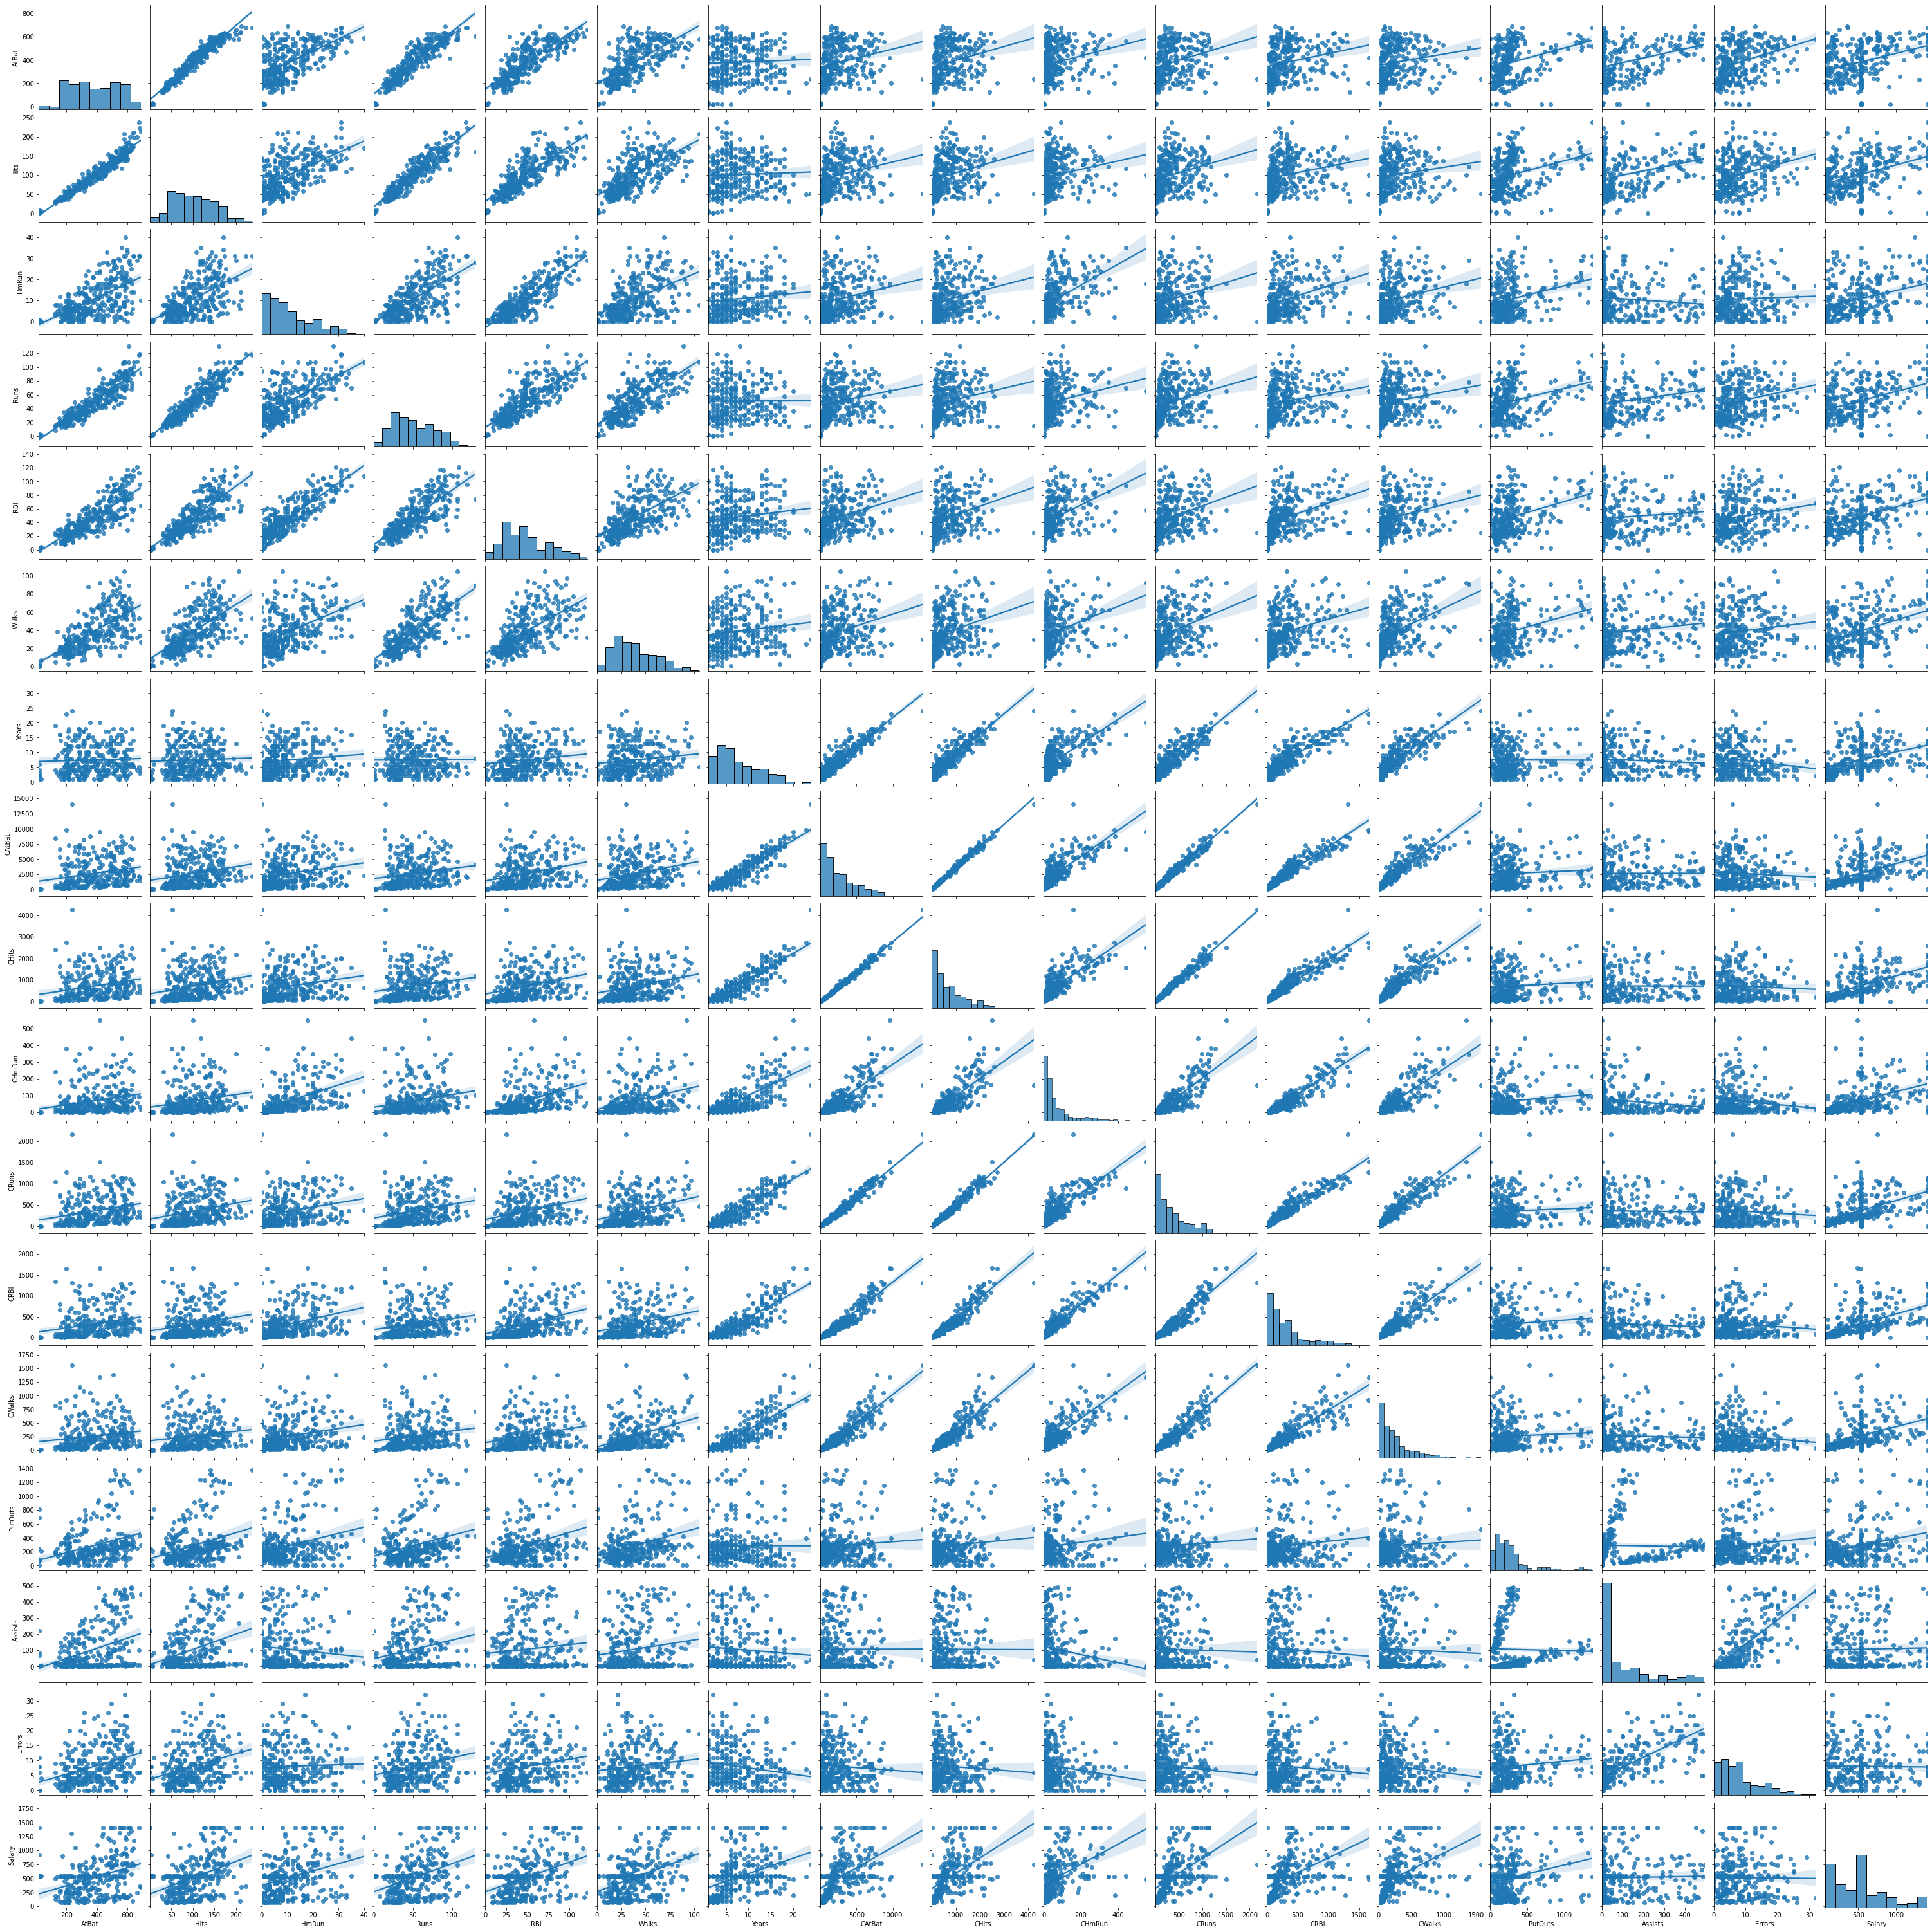

In [20]:
sns.pairplot(maindatac, kind = "reg")

In [21]:
dms = pd.get_dummies(maindatac[["League", "Division", "NewLeague"]])
X_ = maindatac.drop(["Salary","League", "Division", "NewLeague"], axis=1).astype("float64")
y = maindatac["Salary"]
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

print ("X_train", X_train.shape)
print ("X_test", X_test.shape)
print ("y_train", y_train.shape)
print ("y_test", y_test.shape)

X_train (241, 19)
X_test (81, 19)
y_train (241,)
y_test (81,)


#### > **YORUM:**  *X ve y değerleriyle beraber Eğitim ve Test setlerinin oluşturduk*<br> *X: Bağımsız Değer, -tüm değişkenler-* <br> *y: Bağımlı Değer -"Salary" değişkeni*

<a id='4.0'></a>
### **A. Doğrusal Modeller** 

<a id="4.1"></a>
### 1) Basit Doğrusal Regresyon

In [22]:
X_basit = maindatac["CHits"]
X_basit = sm.add_constant(X_basit)
X_basit

# sm kütüphanesinde verilere otomatik bir sabit atanmaz. O yüzden  "X = sm.add_constant(X)" yaparak dışarıdan sabit (1) ataması gerçekleştiriyoruz. Ama smf kütüphanesi otomatik sabit atadığından bu işleme gerek kalmaz

,const,CHits
0,1.0,66
1,1.0,835
2,1.0,457
3,1.0,1575
4,1.0,101
...,...,...
317,1.0,806
318,1.0,1511
319,1.0,433
320,1.0,857


In [23]:
y_basit = maindatac["Salary"]
y_basit[0:5]

0    541.999547
1    475.000000
2    480.000000
3    500.000000
4     91.500000
Name: Salary, dtype: float64

#### Model Oluşturma

In [24]:
lm = sm.OLS(y_basit,X_basit)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     119.0
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           9.21e-24
Time:                        11:41:53   Log-Likelihood:                -2286.3
No. Observations:                 322   AIC:                             4577.
Df Residuals:                     320   BIC:                             4584.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        320.1706     24.358     13.144      0.000     272.248     368.093
CHits          0.2737      0.025     10.907      0.000       0.224       0.323
==============================================================================
Omnibus:                       38.521   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.045
Skew:                           0.854   Prob(JB):                     1.36e-11
Kurtosis:                       3.903   Cond. No.                     1.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# Model Parametreleri
model.params

const    320.170646
CHits      0.273747
dtype: float64

In [26]:
#Modelin Güven Aralığı
model.conf_int()

,0,1
const,272.248013,368.093278
CHits,0.224369,0.323126


In [27]:
print ( "f_pvalue: ","%.4f" % model.f_pvalue)
print ( "f_value: ", "%.2f" % model.fvalue)
print ("t_value: ", "%.2f" % model.tvalues[0:1])
print ( "adj. r2: ", "%.2f" % model.rsquared_adj)

f_pvalue:  0.0000
f_value:  118.96
t_value:  13.14
adj. r2:  0.27


In [28]:
g_t = pd.DataFrame( {"gercek_y": y_basit[0:5],
                        
                    "tahmini_y": model.fittedvalues[0:5]})
g_t

,gercek_y,tahmini_y
0,541.999547,338.237968
1,475.000000,548.749651
2,480.000000,445.273167
3,500.000000,751.322661
4,91.500000,347.819124


In [29]:
print ( "Salary = " + str("%.2f" % model.params[0]) + " +  CHits*" + str("%.2f" % model.params[1]) )

Salary = 320.17 +  CHits*0.27


> **Basit Doğrusal Regresyonun formülü :**  **Salary  = 320.17 +  CHits*0.27**

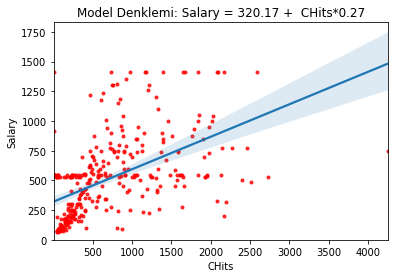

In [30]:
# "Salary" ve "Hits" arasındaki ilişki

fig = sns.regplot( maindatac["CHits"], maindatac["Salary"], scatter_kws={"color": "r","s":9} )
fig.set_title( "Model Denklemi: Salary = 320.17 +  CHits*0.27")
fig.set_ylabel("Salary")
fig.set_xlabel("CHits")


plt.ylim(bottom = 0)
plt.show()

#### Tahmin <br>
**Model :** *Salary = 320.17 +  CHits*0.27* <br>
**Soru :** *Eğer bir atıcı sezon boyunca 2000 atış yapabildiyse maaşı ne olur?*

In [31]:
X_basit = maindatac[["CHits"]]


reg = LinearRegression()
model = reg.fit(X_basit,y_basit)
model.predict([[2000]])

array([867.66526847])


#### Hata Kareleri

In [32]:
# statsmodels.api kullanarak ortalamalar

lm = sm.OLS(y_basit,X_basit)
model = lm.fit()


mse = mean_squared_error(y_basit, model.fittedvalues)
rmse = np.sqrt(mse)

print("Hata Karelerinin Ortalaması: ", mse)
print("Hata Karelerinin Ortalamasının Karekökü: ", rmse)

Hata Karelerinin Ortalaması:  132543.9000279641
Hata Karelerinin Ortalamasının Karekökü:  364.0657907960649


In [33]:
# statsmodels.formula.api kullanarak ortalamalar

lm = smf.ols("Salary ~ CHits", maindatac)
model = lm.fit()


mse = mean_squared_error(y_basit, model.fittedvalues)
rmse = np.sqrt(mse)

print("Hata Karelerinin Ortalaması: ", mse)
print("Hata Karelerinin Ortalamasının Karekökü: ", rmse)


Hata Karelerinin Ortalaması:  86072.64579168225
Hata Karelerinin Ortalamasının Karekökü:  293.38139987341094


In [34]:
k_t = pd.DataFrame( {"gercek_y": y_basit[0:10],
                        
                    "tahmini_y": reg.predict(X_basit)[0:10]})
k_t

,gercek_y,tahmini_y
0,541.999547,338.237968
1,475.000000,548.749651
2,480.000000,445.273167
3,500.000000,751.322661
4,91.500000,347.819124
5,750.000000,630.326349
6,70.000000,331.668033
7,100.000000,349.735355
8,75.000000,343.712914
9,1100.000000,684.802064


In [35]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmini_y"]
k_t

,gercek_y,tahmini_y,hata
0,541.999547,338.237968,203.761579
1,475.000000,548.749651,-73.749651
2,480.000000,445.273167,34.726833
3,500.000000,751.322661,-251.322661
4,91.500000,347.819124,-256.319124
5,750.000000,630.326349,119.673651
6,70.000000,331.668033,-261.668033
7,100.000000,349.735355,-249.735355
8,75.000000,343.712914,-268.712914
9,1100.000000,684.802064,415.197936


In [36]:
k_t["hata_kare"] = k_t["hata"]**2
k_t

,gercek_y,tahmini_y,hata,hata_kare
0,541.999547,338.237968,203.761579,41518.780889
1,475.000000,548.749651,-73.749651,5439.010977
2,480.000000,445.273167,34.726833,1205.952932
3,500.000000,751.322661,-251.322661,63163.079996
4,91.500000,347.819124,-256.319124,65699.493390
5,750.000000,630.326349,119.673651,14321.782627
6,70.000000,331.668033,-261.668033,68470.159362
7,100.000000,349.735355,-249.735355,62367.747687
8,75.000000,343.712914,-268.712914,72206.630392
9,1100.000000,684.802064,415.197936,172389.325679


In [37]:
print ( "Hata Karelerinin Toplamı: ", np.sum(k_t["hata_kare"]) )
print ( "Hata Karelerinin Ortalaması: ", np.mean(k_t["hata_kare"])),
print ( "Hata Karelerinin Ortalamasının Karekökü: ", np.sqrt(np.mean(k_t["hata_kare"])))


Hata Karelerinin Toplamı:  566781.9639322195
Hata Karelerinin Ortalaması:  56678.19639322195
Hata Karelerinin Ortalamasının Karekökü:  238.07183032274514


<a id = '4.2'></a>
### 4.2) Çoklu Doğrusal Regresyon

#### Modelin Oluşturulması

In [38]:
reg = LinearRegression()
model = reg.fit(X_train, y_train)
print ("Sabit Katsayı: ", model.intercept_)
print("Değişkenlerin Katsayıları: ", model.coef_)

Sabit Katsayı:  301.1635362665902
Değişkenlerin Katsayıları:  [ -1.34528617   4.61071192   9.37414815  -0.82774505  -2.60029756
   4.17338852  -0.36715835  -0.11637466   0.27054122  -0.57003804
   0.83953104   0.60985191  -0.70435823   0.17335845   0.30529934
  -4.75062771  55.77632262 -92.64763048 -38.57093439]


#### Tahmin <br>
AtBat        :10 <br>
Hits         :362 <br>
HmRun        :361 <br>
Runs         :362 <br>
RBI          :360 <br>
Walks        :301 <br>
Years        :2001 <br>
CAtBat       :21 <br>
CHits        :355 <br>
CHmRun       :354 <br>
CRuns        :354 <br>
CRBI         :349 <br>
CWalks       :299 <br>
League       :0 <br>
Division     :1 <br>
PutOuts      :12 <br>
Assists      :156 <br>
Errors       :11 <br>
NewLeague    :0 <br>



In [39]:
yeni_katsayilar = [[10], [362], [361], [362], [360],[301],[2001],[21],[355],[354],[354],[349],[299],[1],[1],[12],[156],[11],[11]]
yeni_katsayilar = pd.DataFrame(yeni_katsayilar).T
model.predict(yeni_katsayilar)

array([12019.01836336])

#### Model Doğrulama

In [40]:
y_pred = model.predict(X_train)
y_pred_t = model.predict(X_test)

print("Eğitim Seti Hata Katsayısı: ", np.sqrt(mean_squared_error(y_train, y_pred)))
print("Test Seti Hata Katsayısı: ",np.sqrt(mean_squared_error(y_test, y_pred_t)))


Eğitim Seti Hata Katsayısı:  253.79625791700738
Test Seti Hata Katsayısı:  267.5356095522733


In [41]:
model.score(X_train, y_train)

0.4456058595801832

In [42]:
r2_score(y_train, y_pred)

0.4456058595801832

#### Grafik

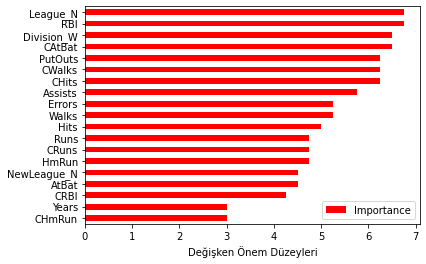

In [43]:
tuned = RandomForestRegressor(max_depth = 1,
                             max_features = 1,
                             n_estimators = 400)
tuned.fit(X_train, y_train)
Importance = pd.DataFrame({"Importance": tuned.feature_importances_ * 100},
                        index = X_train.columns )
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri");

<a id='4.3'></a>
### 4.3) PCR Model

#### Modelin Oluşturulması

In [44]:
pca = PCA()
lm = LinearRegression()
X_reduced_train = pca.fit_transform(scale(X_train))
pcr_model = lm.fit(X_reduced_train, y_train)
print ( "Sabit Katsayı: ", pcr_model.intercept_)
print ("Katsayılar", pcr_model.coef_)

Sabit Katsayı:  507.8625099704469
Katsayılar [  72.15958108   -2.62108785   14.5632268   -18.41903859  -37.10849652
   47.2982956   -19.25164026  -34.22716596   35.0902079    17.89343816
  -53.24484864    9.54537444   49.50070188 -253.34790221   29.74063481
  319.87222327 -225.65660223 -368.4256275    31.40654592]


#### Tahmin

In [45]:
yeni_katsayilar = [[10], [10], [10], [10], [10],[10],[10],[10],[10],[10],[10],[10],[10],[10],[10],[10],[10],[10],[10]]
yeni_katsayilar = pd.DataFrame(yeni_katsayilar).T
model.predict(yeni_katsayilar)

array([-362.50943844])

#### Model Doğrulama

In [46]:
X_reduced_test = pca.fit_transform(scale(X_test))

y_pred = pcr_model.predict(X_reduced_train)
y_pred_t = pcr_model.predict(X_reduced_test)

print("Eğitim Seti Hata Katsayısı", np.sqrt(mean_squared_error(y_train, y_pred)))
print("Test Seti Hata Katsayısı", np.sqrt(mean_squared_error(y_test, y_pred_t)))

Eğitim Seti Hata Katsayısı 253.79625791700735
Test Seti Hata Katsayısı 305.39554002044594


In [47]:
model.score(X_train, y_train)

0.4456058595801832

In [48]:
r2_score(y_train, y_pred)

0.4456058595801833

#### Grafik

In [49]:
cv_10 = model_selection.KFold( n_splits=10,
                               shuffle=True,
                               random_state=1 )
RMSE = []

In [50]:
for i in np.arange(1, X_reduced_train.shape[1]+1):
    score = np.sqrt( -1 * model_selection.cross_val_score( lm,
                                                           X_reduced_train[:,:i],
                                                           y_train.ravel(),
                                                           cv= cv_10,
                                                           scoring="neg_mean_squared_error" ).mean())
    RMSE.append(score)

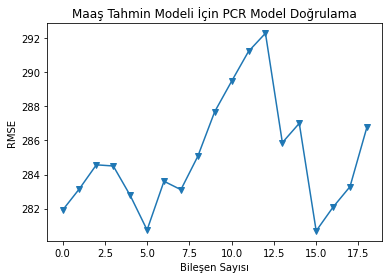

In [51]:
plt.plot(RMSE, "-v")
plt.xlabel("Bileşen Sayısı")
plt.ylabel("RMSE")
plt.title("Maaş Tahmin Modeli İçin PCR Model Doğrulama");

<a id ="4.4"></a>
### 4.4) PLS Model

#### Modelin Oluşturulması

In [52]:
pls_model = PLSRegression().fit(X_train, y_train)

print("Değişken Katsayılar: ", pls_model.coef_)

Değişken Katsayılar:  [[ 10.78019021]
 [ 26.47434545]
 [  7.41287405]
 [ 18.10701317]
 [ 16.55429408]
 [ 19.94725317]
 [ 14.36368977]
 [ 24.69025723]
 [ 32.61989548]
 [ 17.55254892]
 [ 29.42933529]
 [ 28.01694023]
 [  8.45904965]
 [ 41.44966717]
 [ -0.17811615]
 [-14.09808246]
 [ 19.12326362]
 [-48.89656193]
 [ 11.5938129 ]]


#### Tahmin

#### Model Doğrulama

In [53]:
y_pred = pls_model.predict(X_train)
y_pred_t = pls_model.predict(X_test)

print ("Eğitim Seti Hata Katsayısı: ", np.sqrt(mean_squared_error(y_train, y_pred)))
print ("Test Seti Hata Katsayısı: ", np.sqrt(mean_squared_error(y_test, y_pred_t)))

Eğitim Seti Hata Katsayısı:  269.0713014395246
Test Seti Hata Katsayısı:  265.8742083923319


In [54]:
#R2 Değeri
r2_score(y_train, y_pred)

0.37686382903982973

In [55]:
model.score(X_train, y_train)

0.4456058595801832

#### Grafik

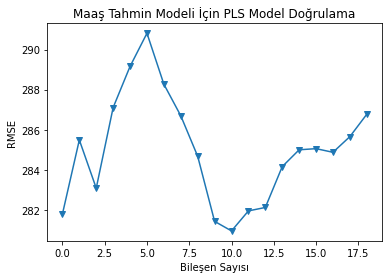

In [56]:
cv_10 = model_selection.KFold( n_splits=10,
                               shuffle=True,
                               random_state=1 )
RMSE = []

for i in np.arange(1, X_train.shape[1]+1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt( -1 * cross_val_score( pls,
                                            X_train,
                                            y_train,
                                            cv= cv_10,
                                            scoring="neg_mean_squared_error" ).mean())
    RMSE.append(score)

plt.plot(RMSE, "-v")
plt.xlabel("Bileşen Sayısı")
plt.ylabel("RMSE")
plt.title("Maaş Tahmin Modeli İçin PLS Model Doğrulama");

<a id="4.5"></a>
### 4.5) Ridge Regresyon

#### Modelin Oluşturulması

In [57]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)
print("Sabit Katsayı :", ridge_model.intercept_)
print("Değişken Katsayıları :", ridge_model.coef_)

Sabit Katsayı : 301.1571928057041
Değişken Katsayıları : [ -1.34600726   4.61150439   9.37161948  -0.82662679  -2.59848163
   4.17262923  -0.36925955  -0.11636302   0.27030518  -0.56999471
   0.83983879   0.6099817   -0.70438924   0.17338471   0.30543499
  -4.74709285  55.08842728 -92.50734401 -37.88556242]


#### Tahmin

#### Model Doğrulama

In [58]:
y_pred = ridge_model.predict(X_train)
y_pred_t = ridge_model.predict(X_test)

print("Eğitim Seti Hata Katsayısı: ", np.sqrt(mean_squared_error(y_train,y_pred)))
print("Test Seti Hata Katsayısı: ", np.sqrt(mean_squared_error(y_test,y_pred_t)))

Eğitim Seti Hata Katsayısı:  253.79632076503762
Test Seti Hata Katsayısı:  267.51922437557573


In [59]:
ridge_model.score(X_train, y_train)

0.4456055850088848

In [60]:
r2_score(y_train, y_pred)

0.4456055850088848

#### Grafik

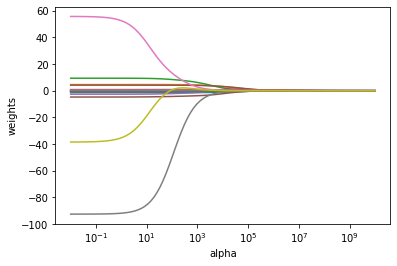

In [61]:
ridge = Ridge()
lambdalar = 10**np.linspace(10,-2,100)*0.5 
katsayilar = []

for i in lambdalar:
    ridge.set_params(alpha=i)
    ridge.fit(X_train, y_train)
    katsayilar.append(ridge.coef_)
    
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights');

<a id='4.6'></a>
### 4.6) Lasso Model

#### Modelin Oluşturulması

In [62]:
lasso_model = Lasso().fit(X_train, y_train)

print("Sabit Katsayı: ", lasso_model.intercept_)
print("Değişken Katsayılar: ", lasso_model.coef_)

Sabit Katsayı:  300.69669344518184
Değişken Katsayılar:  [ -1.36224407   4.54194315   9.09457181  -0.6616571   -2.46141954
   4.07994153  -0.          -0.12199401   0.29327118  -0.5021606
   0.8292731    0.5896787   -0.69634908   0.17502976   0.3123849
  -4.56512568  20.24109275 -89.14799301  -2.48091611]


#### Tahmin

#### Model Doğrulama

In [63]:
y_pred = lasso_model.predict(X_train)
y_pred_t = lasso_model.predict(X_test)

print("Eğtim Seti Hata Katsayısı: ", np.sqrt(mean_squared_error(y_train, y_pred)))
print("Test Seti Hata Katsayısı: ", np.sqrt(mean_squared_error(y_test, y_pred_t)))

Eğtim Seti Hata Katsayısı:  253.94846045713467
Test Seti Hata Katsayısı:  266.94140433927174


#### Grafik

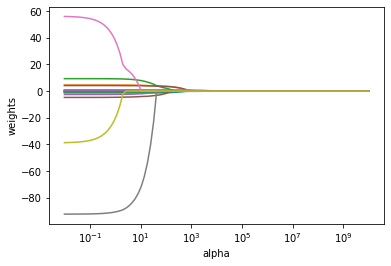

In [64]:
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5 
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights');

<a id='4.7'></a>
### 4.7) ElasticNet 

#### Modelin Oluşturulması

In [65]:
elas_model = ElasticNet().fit(X_train, y_train)

print("Sabit Katsayılar: ", elas_model.intercept_)
print("Değişken Katsayılar: ", elas_model.coef_)

Sabit Katsayılar:  275.1841138657241
Değişken Katsayılar:  [ -1.38415023   4.42730401   7.5862284   -0.493456    -1.8678873
   4.06409182   0.64483586  -0.1450626    0.35876386  -0.43763296
   0.83287588   0.57509837  -0.67708303   0.16886623   0.32071534
  -4.122143     7.49408027 -29.24678211   1.58313695]


#### Tahmin

#### Model Doğrulama

In [66]:
y_pred = elas_model.predict(X_train)
y_pred_t = elas_model.predict(X_test)

print("Eğitim Seti Hata Katsayısı: ", np.sqrt(mean_squared_error(y_train, y_pred)))
print("Test Seti Hata Katsayısı: ", np.sqrt(mean_squared_error(y_test, y_pred_t)))

Eğitim Seti Hata Katsayısı:  256.00525204247975
Test Seti Hata Katsayısı:  268.0612290230244


In [67]:
elas_model.score(X_train, y_train)

0.4359131794433688

In [68]:
r2_score(y_train, y_pred)

0.4359131794433688

#### Grafik

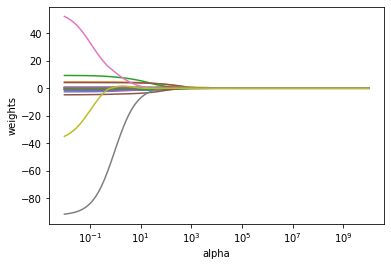

In [69]:
elastic = ElasticNet()
lambdalar = 10**np.linspace(10,-2,100)*0.5 
katsayilar = []

for i in lambdalar:
    elastic.set_params(alpha=i)
    elastic.fit(X_train, y_train)
    katsayilar.append(elastic.coef_)
    
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights');

> YORUM

<a id='5.0'></a>
### **B) Doğrusal Olmayan Modeller**

<a id='5.1'></a>
### 5.1) KNN Modeli

#### Modelin Oluşturulması

In [70]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

print("En Yakın Komşu Sayısı: ", knn_model.n_neighbors)

En Yakın Komşu Sayısı:  5


#### Tahmin

In [71]:
y_pred = knn_model.predict(X_train)
y_pred_t = knn_model.predict(X_test)

print("Eğitim Seti Hata Katsayısı: ", np.sqrt(mean_squared_error(y_train, y_pred)))
print("Test Seti Hata Katsayısı: ", np.sqrt(mean_squared_error(y_test, y_pred_t)))

Eğitim Seti Hata Katsayısı:  211.66600925574943
Test Seti Hata Katsayısı:  270.66935116244537


#### Model Doğrulama

In [72]:
knn = KNeighborsRegressor()
knn_params = {"n_neighbors": np.arange(1,50,1)}
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [73]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])
knn_tuned.fit(X_train, y_train)


np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))


268.0762402464101

<a id='5.2'></a>
### 5.2) SVR (Destek Vektör Regresyonu)

#### Modelin Oluşturulması

In [74]:
X_train_svr = pd.DataFrame(X_train["Hits"])
X_test_svr = pd.DataFrame(X_test["Hits"])

In [75]:
svr_model = SVR("linear").fit(X_train_svr, y_train)

print("Sabit Katsayı: ", svr_model.intercept_)
print("Değişken Katsayılar: ", svr_model.coef_)


Sabit Katsayı:  [178.12947201]
Değişken Katsayılar:  [[3.05689138]]


#### Tahmin

In [76]:
y_pred = svr_model.predict(X_train_svr)
y_pred_t = svr_model.predict(X_test_svr)
 
print("Eğitim Seti Hata Katsayısı: ", np.sqrt(mean_squared_error(y_train, y_pred)))
print("Test Seti Hata Katsayısı: ", np.sqrt(mean_squared_error(y_test, y_pred_t)))

Eğitim Seti Hata Katsayısı:  318.2120980214879
Test Seti Hata Katsayısı:  313.8392986139514


#### Model Doğrulama

In [77]:
svr_params = {"C": np.arange(0.1,1,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10, n_jobs=-1)

svr_cv_model.fit(X_train_svr, y_train)

GridSearchCV(cv=10, estimator=SVR(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])})

In [78]:
svr_tuned = SVR("linear",
               C = pd.Series(svr_cv_model.best_params_))
svr_tuned.fit(X_train_svr, y_train)

np.sqrt(mean_squared_error(y_test, svr_tuned.predict(X_test_svr)))

313.8392986139506

<a id='5.3'></a>
### 5.3) Doğrusal Olmayan SVR Modeli

#### Modelin Oluşturulması

In [79]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
svr_model_d = SVR("rbf").fit(X_train_scaled, y_train)

print("Sabit Katsayı: ", svr_model_d.intercept_)


Sabit Katsayı:  [530.11049243]


In [81]:
y_pred = svr_model_d.predict(X_train)
y_pred_t = svr_model_d.predict(X_test)

print("Eğitim Seti Hata Katsayısı: ", np.sqrt(mean_squared_error(y_train, y_pred)))
print("Test Seti Hata Katsayısı: ", np.sqrt(mean_squared_error(y_test, y_pred_t)))

Eğitim Seti Hata Katsayısı:  341.5851824714581
Test Seti Hata Katsayısı:  350.6205904870894


In [82]:
svr_params = {"C": np.arange(1,20,1)}
svr_cv_model_d = GridSearchCV(svr_model_d, svr_params, cv = 10, n_jobs=-1)
svr_cv_model_d.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [83]:
svr_tuned = SVR("rbf",
               C = pd.Series(svr_cv_model_d.best_params_))
svr_tuned.fit(X_train, y_train)

np.sqrt(mean_squared_error(y_test, svr_tuned.predict(X_test)))

301.5794743571825

<a id='5.4'></a>
### 5.4) Çok Katmanlı Algılayıcı Modeli

#### Modelin Oluşturulması

In [84]:
mlp_model = MLPRegressor(hidden_layer_sizes=(100,20)).fit(X_train_scaled, y_train)


In [85]:
y_pred = mlp_model.predict(X_train)
y_pred_t = mlp_model.predict(X_test)

print("Eğitim Seti Hata Katsayısı: ", np.sqrt(mean_squared_error(y_train, y_pred)))
print("Test Seti Hata Katsayısı: ", np.sqrt(mean_squared_error(y_test, y_pred_t)))

Eğitim Seti Hata Katsayısı:  352147.2271122503
Test Seti Hata Katsayısı:  378510.8190902554


In [86]:
mlp_params = {"alpha": [10,20,30,40,50],
              "hidden_layer_sizes": (20,20),
              "activation": ["relu","logistic"]}
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10, n_jobs=-1)
mlp_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [10, 20, 30, 40, 50],
                         'hidden_layer_sizes': (20, 20)})

In [87]:
mlp_tuned = MLPRegressor(alpha = mlp_cv_model.best_params_["alpha"],
                        hidden_layer_sizes = mlp_cv_model.best_params_["hidden_layer_sizes"],
                        activation = mlp_cv_model.best_params_["activation"]).fit(X_train, y_train)

np.sqrt(mean_squared_error(y_test, mlp_tuned.predict(X_test)))

259.5427851228465

<a id ='5.5'></a>
### 5.5) CART Modeli

#### Modelin Oluşturulması

In [88]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])
cart_model = DecisionTreeRegressor(min_samples_split = 2).fit(X_train, y_train)


#### Tahmin

In [89]:
y_pred = cart_model.predict(X_train)
y_pred_t = cart_model.predict(X_test)

print("Eğitim Seti Hata Katsayısı: ", np.sqrt(mean_squared_error(y_train, y_pred)))
print("Test Seti Hata Katsayısı: ", np.sqrt(mean_squared_error(y_test, y_pred_t)))

Eğitim Seti Hata Katsayısı:  193.4135010996336
Test Seti Hata Katsayısı:  428.1071009741619


#### Model Doğrulama

In [90]:
cart_params = {"min_samples_split": range(2,200),
               "max_leaf_nodes": range(2,10)}
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10, n_jobs=-1)
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 200)})

In [91]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes= cart_cv_model.best_params_["max_leaf_nodes"],
                                   min_samples_split = cart_cv_model.best_params_["min_samples_split"]).fit(X_train, y_train)

np.sqrt(mean_squared_error(y_test, cart_tuned.predict(X_test)))

333.78563854835636

#### Grafik

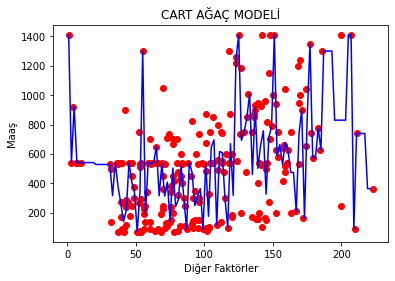

In [92]:
X_grid = np.arange(min(np.array(X_train)), max(np.array(X_train)), 2)
X_grid = X_grid.reshape((len(X_grid),1))

plt.scatter(X_train, y_train, color="red")
plt.plot(X_grid, cart_model.predict(X_grid), color ="blue")
plt.title("CART AĞAÇ MODELİ")
plt.xlabel("Diğer Faktörler")
plt.ylabel("Maaş");

<a id ='5.6'></a>
### 5.6) Bagged Trees Regresyon Modeli

#### Modelin Oluşturulması

In [93]:
bagged_model = BaggingRegressor(bootstrap_features=True).fit(X_train, y_train)


In [94]:
y_pred = bagged_model.predict(X_train)
y_pred_t = bagged_model.predict(X_test)

print("Eğitim Seti Hata Katsayısı: ", np.sqrt(mean_squared_error(y_train, y_pred)))
print("Test Seti Hata Katsayısı: ", np.sqrt(mean_squared_error(y_test, y_pred_t)))

Eğitim Seti Hata Katsayısı:  218.87404683594667
Test Seti Hata Katsayısı:  393.980968741159


In [95]:
bagged_params = {"n_estimators": range(2,20)}
bagged_cv_model = GridSearchCV(bagged_model, bagged_params, cv = 10, n_jobs=-1)
bagged_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             n_jobs=-1, param_grid={'n_estimators': range(2, 20)})

In [96]:
bagged_tuned = BaggingRegressor(n_estimators = bagged_cv_model.best_params_["n_estimators"]).fit(X_train, y_train)

np.sqrt(mean_squared_error(y_test, bagged_tuned.predict(X_test)))

393.44376260198055

#### Grafik

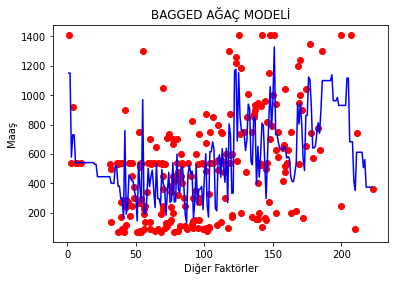

In [97]:
X_grid = np.arange(min(np.array(X_train)), max(np.array(X_train)), 1)
X_grid = X_grid.reshape((len(X_grid),1))

plt.scatter(X_train, y_train, color="red")
plt.plot(X_grid, bagged_model.predict(X_grid), color ="blue")
plt.title("BAGGED AĞAÇ MODELİ")
plt.xlabel("Diğer Faktörler")
plt.ylabel("Maaş");

<a id ='5.7'></a>
### 5.7) Random Forests Modeli

In [98]:
randomf_model = RandomForestRegressor(random_state=42).fit(X_train, y_train)


#### Tahmin

In [99]:
y_pred = randomf_model.predict(X_train)
y_pred_t = randomf_model.predict(X_test)

print("Eğitim Seti Hata Katsayısı: ", np.sqrt(mean_squared_error(y_train, y_pred)))
print("Test Seti Hata Katsayısı: ", np.sqrt(mean_squared_error(y_test, y_pred_t)))

Eğitim Seti Hata Katsayısı:  213.09722684079563
Test Seti Hata Katsayısı:  395.2287383849203


#### Model Doğrulama

In [100]:
randomf_params = {"max_depth": list(range(1,20)) ,
                  "max_features": [1,2,3,4,5,6,7,8],
                  "n_estimators": [100,200,300,400,500]}
randomf_cv_model = GridSearchCV(randomf_model, randomf_params, cv = 10, n_jobs=-1)
randomf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [101]:
randomf_cv_model.best_params_["max_depth"]

1

In [102]:
randomf_tuned = RandomForestRegressor(n_estimators = randomf_cv_model.best_params_["n_estimators"],
                                      max_depth = randomf_cv_model.best_params_["max_depth"],
                                      max_features = randomf_cv_model.best_params_["max_features"]).fit(X_train, y_train)

np.sqrt(mean_squared_error(y_test, randomf_tuned.predict(X_test)))

313.63794047342867

#### Grafik

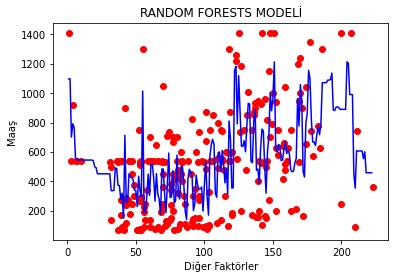

In [103]:
X_grid = np.arange(min(np.array(X_train)), max(np.array(X_train)), 1)
X_grid = X_grid.reshape((len(X_grid),1))

plt.scatter(X_train, y_train, color="red")
plt.plot(X_grid, randomf_model.predict(X_grid), color ="blue")
plt.title("RANDOM FORESTS MODELİ")
plt.xlabel("Diğer Faktörler")
plt.ylabel("Maaş");

<a id='5.8'></a>
### 5.8) Gradient Boosting Machines Modeli

In [104]:
gradient_model = GradientBoostingRegressor().fit(X_train, y_train)

#### Tahmin

In [105]:
y_pred = gradient_model.predict(X_train)
y_pred_t = gradient_model.predict(X_test)

print("Eğitim Seti Hata Katsayısı: ", np.sqrt(mean_squared_error(y_train, y_pred)))
print("Test Seti Hata Katsayısı: ", np.sqrt(mean_squared_error(y_test, y_pred_t)))

Eğitim Seti Hata Katsayısı:  229.0507122929836
Test Seti Hata Katsayısı:  364.7296379249795


#### Model Doğrulama

In [106]:
gradient_params = {"max_depth": list(range(1,10)) ,
                   "n_estimators": [100,200],
                   "learning_rate": [0.1,0.2,0.3,0.4,0.5],
                   "subsample": [0.5,1,2]}
gradient_cv_model = GridSearchCV(gradient_model, gradient_params, cv = 10, n_jobs=-1)
gradient_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [100, 200], 'subsample': [0.5, 1, 2]})

In [107]:
gradient_tuned = GradientBoostingRegressor(n_estimators = gradient_cv_model.best_params_["n_estimators"],
                                           max_depth = gradient_cv_model.best_params_["max_depth"],
                                           learning_rate = gradient_cv_model.best_params_["learning_rate"],
                                           subsample = gradient_cv_model.best_params_["subsample"]).fit(X_train, y_train)

np.sqrt(mean_squared_error(y_test, gradient_tuned.predict(X_test)))

329.79744935432853

<a id='5.9'></a>
### 5.9) XGBoost Modeli

In [108]:
xgb_model = XGBRegressor().fit(X_train, y_train)

#### Tahmin

In [109]:
y_pred = xgb_model.predict(X_train)
y_pred_t = xgb_model.predict(X_test)

print("Eğitim Seti Hata Katsayısı: ", np.sqrt(mean_squared_error(y_train, y_pred)))
print("Test Seti Hata Katsayısı: ", np.sqrt(mean_squared_error(y_test, y_pred_t)))

Eğitim Seti Hata Katsayısı:  193.6678282402424
Test Seti Hata Katsayısı:  412.05570788820916


#### Model Doğrulama

In [110]:
xgb = XGBRegressor()
xgb_params = {"colsample_bytree": [0.5,1],
              "n_estimators": [100,200,300],
              "learning_rate": [0.1,0.3,0.5],
              "max_depth": [2,4,6]}
xgb_cv_model = GridSearchCV(xgb, param_grid=xgb_params, cv = 10, verbose =2)
xgb_cv_model = xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=2, n_estimators=100 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=2, n_estimators=100, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=2, n_estimators=100 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=2, n_estimators=100, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=2, n_estimators=100 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=2, n_estimators=100, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=2, n_estimators=100 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=2, n_estimators=100, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=2, n_estimators=100 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=2, n_estimators=100, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=2, n_estimators=100, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=2, n_estimators=100 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=2, n_estimators=100, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=2, n_estimators=100 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=2, n_estimators=100, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=2, n_estimators=100 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=2, n_estimators=100, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=2, n_estimators=100 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=2, n_estimators=100, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=2, n_estimators=200 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=2, n_estimators=200, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=2, n_es

[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:   51.2s finished


In [111]:
xgb_tuned = XGBRegressor(n_estimators = xgb_cv_model.best_params_["n_estimators"],
                                        max_depth = xgb_cv_model.best_params_["max_depth"],
                                        learning_rate = xgb_cv_model.best_params_["learning_rate"],
                                        colsample_bytree = xgb_cv_model.best_params_["colsample_bytree"]).fit(X_train, y_train)

np.sqrt(mean_squared_error(y_test, xgb_tuned.predict(X_test)))

336.07087732828376

<a id='5.10'></a>
### 5.10) Light GBM Modeli

#### Modelin Oluşturulması

In [112]:
lgbm_model = LGBMRegressor().fit(X_train, y_train)

#### Tahmin

In [113]:
y_pred = lgbm_model.predict(X_train)
y_pred_t = lgbm_model.predict(X_test)

print("Eğitim Seti Hata Katsayısı: ", np.sqrt(mean_squared_error(y_train, y_pred)))
print("Test Seti Hata Katsayısı: ", np.sqrt(mean_squared_error(y_test, y_pred_t)))

Eğitim Seti Hata Katsayısı:  287.2063345678782
Test Seti Hata Katsayısı:  329.65443165681376


#### Model Doğrulama

In [114]:
lgbm = LGBMRegressor()
lgbm_params = {"colsample_bytree": [0.3,0.5,0.7,1],
              "n_estimators": [100,200,300,400,500],
              "learning_rate": [0.1,0.2,0.3,0.4,0.5],
              "max_depth": [2,4,6]}
lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, cv = 10, n_jobs=-1, verbose =2 )
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 686 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 1252 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 1982 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done 2872 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  1.2min finished


GridSearchCV(cv=10, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.5, 0.7, 1],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'max_depth': [2, 4, 6],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=2)

In [115]:
lgbm_tuned = XGBRegressor(n_estimators = lgbm_cv_model.best_params_["n_estimators"],
                                        max_depth = lgbm_cv_model.best_params_["max_depth"],
                                        learning_rate = lgbm_cv_model.best_params_["learning_rate"],
                                        colsample_bytree = lgbm_cv_model.best_params_["colsample_bytree"]).fit(X_train, y_train)

np.sqrt(mean_squared_error(y_test, lgbm_tuned.predict(X_test)))

336.07087732828376

<a id='5.11'></a>
### 5.11) CatBoost Modeli

#### Model Oluşturma

In [116]:
cat_model = CatBoostRegressor().fit(X_train, y_train);

Learning rate set to 0.030297
0:	learn: 338.8986088	total: 57.4ms	remaining: 57.3s
1:	learn: 336.8309301	total: 58.2ms	remaining: 29.1s
2:	learn: 335.2687198	total: 58.9ms	remaining: 19.6s
3:	learn: 333.5016429	total: 59.4ms	remaining: 14.8s
4:	learn: 331.8393559	total: 60.1ms	remaining: 12s
5:	learn: 330.2346403	total: 60.7ms	remaining: 10.1s
6:	learn: 328.5562208	total: 61.4ms	remaining: 8.71s
7:	learn: 326.9189284	total: 62ms	remaining: 7.69s
8:	learn: 325.3944638	total: 62.6ms	remaining: 6.89s
9:	learn: 323.9876426	total: 63.2ms	remaining: 6.26s
10:	learn: 322.6780690	total: 63.8ms	remaining: 5.73s
11:	learn: 321.4200999	total: 64.4ms	remaining: 5.3s
12:	learn: 320.0061925	total: 64.8ms	remaining: 4.92s
13:	learn: 318.8729665	total: 65.4ms	remaining: 4.61s
14:	learn: 317.7580671	total: 66.3ms	remaining: 4.36s
15:	learn: 316.7469925	total: 67ms	remaining: 4.12s
16:	learn: 315.8583679	total: 67.6ms	remaining: 3.91s
17:	learn: 314.8965855	total: 68.4ms	remaining: 3.73s
18:	learn: 313.

#### Tahmin

In [117]:
y_pred = cat_model.predict(X_train)
y_pred_t = cat_model.predict(X_test)

print("Eğitim Seti Hata Katsayısı: ", np.sqrt(mean_squared_error(y_train, y_pred)))
print("Test Seti Hata Katsayısı: ", np.sqrt(mean_squared_error(y_test, y_pred_t)))

Eğitim Seti Hata Katsayısı:  232.31140278438028
Test Seti Hata Katsayısı:  369.46823587628205


#### Modelin Doğruluğu

In [118]:
cat = CatBoostRegressor()
cat_params = {"iterations": [100,150,200,250,300],
              "learning_rate": [0.1,0.2,0.3,0.4,0.5],
              "depth": [2,4,6]}
cat_cv_model = GridSearchCV(cat, cat_params, cv = 10, n_jobs=-1, verbose = 3).fit(X_train, y_train)


Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:   26.7s


0:	learn: 335.8652591	total: 309us	remaining: 30.7ms
1:	learn: 330.6410175	total: 819us	remaining: 40.1ms
2:	learn: 326.3025665	total: 984us	remaining: 31.8ms
3:	learn: 322.7297160	total: 1.15ms	remaining: 27.5ms
4:	learn: 318.6591254	total: 1.28ms	remaining: 24.4ms
5:	learn: 316.0615747	total: 1.46ms	remaining: 22.9ms
6:	learn: 314.0179224	total: 1.62ms	remaining: 21.5ms
7:	learn: 312.5832269	total: 1.79ms	remaining: 20.6ms
8:	learn: 310.9528419	total: 2.13ms	remaining: 21.6ms
9:	learn: 309.5689245	total: 2.29ms	remaining: 20.6ms
10:	learn: 308.3886343	total: 2.47ms	remaining: 20ms
11:	learn: 306.8093774	total: 2.63ms	remaining: 19.3ms
12:	learn: 305.8379694	total: 2.81ms	remaining: 18.8ms
13:	learn: 305.2309837	total: 3ms	remaining: 18.4ms
14:	learn: 304.5556521	total: 3.13ms	remaining: 17.8ms
15:	learn: 303.6665358	total: 3.31ms	remaining: 17.4ms
16:	learn: 302.9303108	total: 3.49ms	remaining: 17ms
17:	learn: 302.0738091	total: 3.65ms	remaining: 16.6ms
18:	learn: 301.4647161	total: 

[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:   48.7s finished


In [119]:
cat_tuned = XGBRegressor(iterations = cat_cv_model.best_params_["iterations"],
                         learning_rate = cat_cv_model.best_params_["learning_rate"],
                         depth = cat_cv_model.best_params_["depth"]).fit(X_train, y_train)

np.sqrt(mean_squared_error(y_test, cat_tuned.predict(X_test)))

[12:00:05] WARNING: ../src/learner.cc:573: 
Parameters: { "depth", "iterations" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




378.6478603219179